In [1]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

C:\Users\tcx7\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


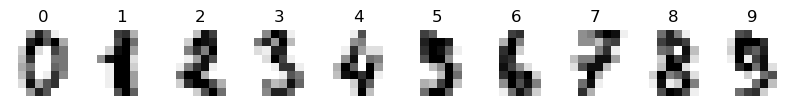

In [2]:
dataset = datasets.load_digits()

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, dataset.images, dataset.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(label)

Converts 8x8 to 64x1

In [3]:
data = dataset.images.reshape((len(dataset.images), -1))
#data2 = dataset.images
#print(np.shape(data2))
print(np.shape(data))

(1797, 64)


In [4]:
classifier = svm.SVC(gamma=0.006)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, test_size = 0.5)

In [6]:
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)

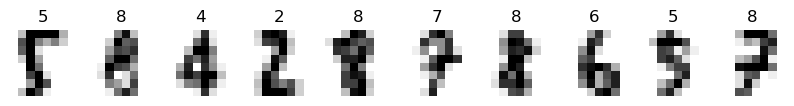

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8,8)
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(prediction)

In [8]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        74
           1       1.00      0.95      0.97        96
           2       1.00      0.88      0.94        95
           3       1.00      0.78      0.88        93
           4       1.00      0.88      0.94        85
           5       0.96      0.98      0.97        81
           6       1.00      0.82      0.90        99
           7       1.00      0.77      0.87        97
           8       0.41      1.00      0.58        81
           9       1.00      0.77      0.87        98

    accuracy                           0.87       899
   macro avg       0.94      0.87      0.89       899
weighted avg       0.94      0.87      0.89       899



Gamma = 0,001 
test_size = 0,7
Accuracy = macro_avg = weighted_avg = 0,98

Gamma = 0,001
test_size = 0,5
Accuracy = macro_avg = weighted_avg = 0,99

Gamma = 0,01
test_size = 0,7
Accuracy, macro_avg, weighted_avg = 0.53, 0.59, 0.58 
worst results:
    5 - lowest recall = 0,11; f1-score = 0,20
    8 - lowset precision = 0,17 (all other are 1); f1-score = 0,29 (propablly, it gives 8 whenever it is not sure what to do, and 5 is similar)
    
Gamma = 0,01
test_size = 0,5
Accuracy, macro_avg, weighted_avg = 0.53, 0.59, 0.58 
results very similar to test above

Gamma = 0, 005
test_size = 0,5
Accuracy, macro_avg, weighted_avg = 0.96, 0.97, 0.97
1, 3, 8 don't have 1 precision (8 worst)
9 have worst recall (0,89)

Gamma = 0,006
test_size = 0,5
Accuracy, macro_avg, weighted_avg = 0.91, 0.92, 0.92


In [9]:
import seaborn as sns

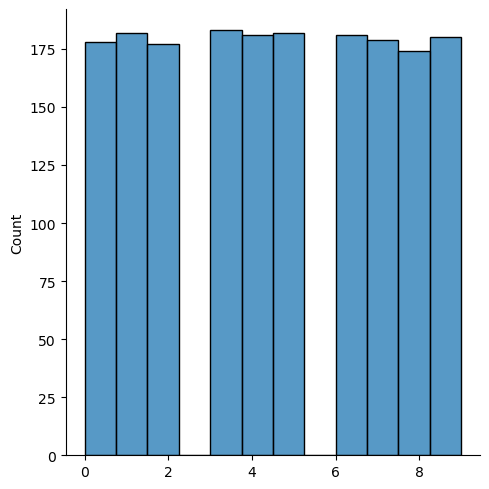

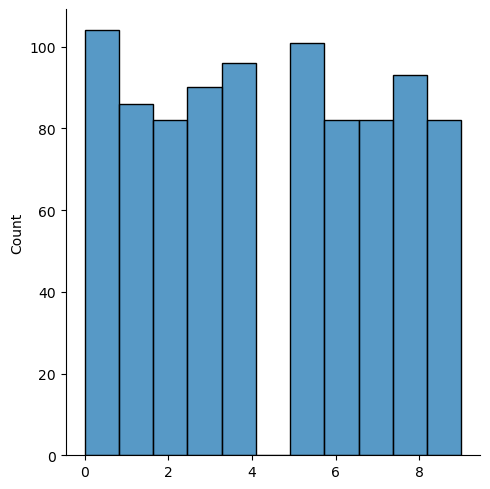

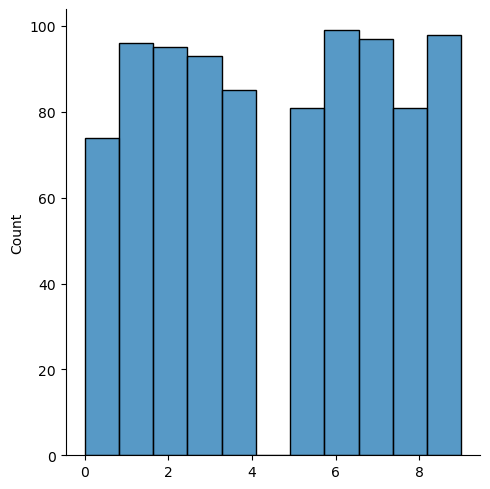

In [10]:
#to-do: fix those (delete these blank columns)
sns.displot(dataset.target)
sns.displot(y_train)
sns.displot(y_test)

plt.show()

In [11]:
print(type(dataset))
print(type(dataset.images))
print(type(dataset.target))
print(dataset.images[0], dataset.target[0])

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 0


In [14]:
import cv2

In [88]:
image = cv2.imread("0.png")
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(type(gray_image), gray_image.shape)
print(gray_image)


<class 'numpy.ndarray'> (8, 8)
[[255 255 255 255 255 255 255 255]
 [255 255 255  48   0  48 255 255]
 [255 255  48  16 255   0 255 255]
 [255 255   0 255 255   0 255 255]
 [255 255  16 239 255   0 255 255]
 [255 255 207  16   0  16 255 255]
 [255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255]]


In [106]:
images = cv2.imread("digits.png")
my_dataset = cv2.cvtColor(images, cv2.COLOR_BGR2GRAY)
HEIGHT = my_dataset.shape[0]//10
WIDTH = my_dataset.shape[1]//10

my_dataset = np.vsplit(my_dataset, HEIGHT)
digits=[]

for i in range(HEIGHT):
    digits.append(np.hsplit(my_dataset[i], WIDTH))
    
for i in range(HEIGHT):
    for j in range(WIDTH):
        digits[i][j] = digits[i][j].reshape(1,100)
        
digits_class = [[i for _ in range(WIDTH)] for i in range(HEIGHT)]


In [107]:
classifier2 = svm.SVC(gamma = 0.001)
digits = [digits[i][j] for i in range(HEIGHT) for j in range(WIDTH)]
digits_class = [digits_class[i][j] for i in range(HEIGHT) for j in range(WIDTH)]

X_train, X_test, y_train, y_test = train_test_split(digits, digits_class, test_size = 0.3)

In [108]:
classifier2.fit(X_train, y_train)

ValueError: Found array with dim 3. Estimator expected <= 2.